<a href="https://colab.research.google.com/github/shuklasuraj1000/Assignment/blob/main/Assignment_13_NOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

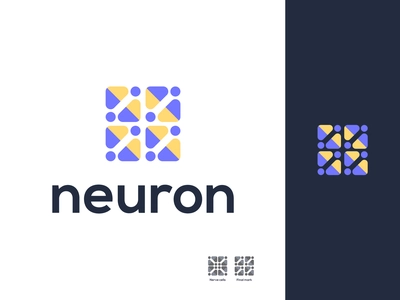


**Algerian forest fires dataset**

> **Life cycle of Machine learning Project**
1.   Data ingestion
2.   EDA
3.   FE
4.   ML Model
5.   List item

**Context**

There's a story behind every dataset and here's your opportunity to share yours.

**Content**

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

> **Source:**
1.   ***URL:*** https://raw.githubusercontent.com/shuklasuraj1000/EDA_DATA/main/Admission_Predict.csv













**Import Data and Required Packages**

`Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Import the CSV Data from Git as Pandas DataFrame**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shuklasuraj1000/EDA_DATA/main/Admission_Predict.csv")

**Exploring schemas/Features**

In [3]:
df.head()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


**Shape and Size of Data**

In [4]:
df.shape

(500, 9)

**Checking data tpye and checking null**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         500 non-null    float64
 1   GREScore          500 non-null    float64
 2   TOEFLScore        500 non-null    float64
 3   UniversityRating  500 non-null    float64
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    float64
 8   Admit             500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


**Observation:** All features are numeric, one null value found.

**Quick observation for outlier:**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SerialNo.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GREScore,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFLScore,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
UniversityRating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Observation:** By seeing 25%, 50%  and 75% of all nemeric features, quically we can say that outliers are very less .

**Dropping Null row:**

In [7]:
df.isnull().sum()

SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
Admit               0
dtype: int64

In [8]:
df.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Admit'],
      dtype='object')

**DATA FOR ANALYSIS:**

**Data feature segregation:**

In [9]:
dependent_feature=df['Admit']

independent_features=df[['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR','CGPA', 'Research']]

In [10]:
independent_features.head(10)

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0
5,6.0,330.0,115.0,5.0,4.5,3.0,9.34,1.0
6,7.0,321.0,109.0,3.0,3.0,4.0,8.20,1.0
7,8.0,308.0,101.0,2.0,3.0,4.0,7.90,0.0
8,9.0,302.0,102.0,1.0,2.0,1.5,8.00,0.0
9,10.0,323.0,108.0,3.0,3.5,3.0,8.60,0.0


**EXPLORING DATA**

**Univariate Analysis**

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

**independent_feature**

In [11]:
ind_features=independent_features.columns

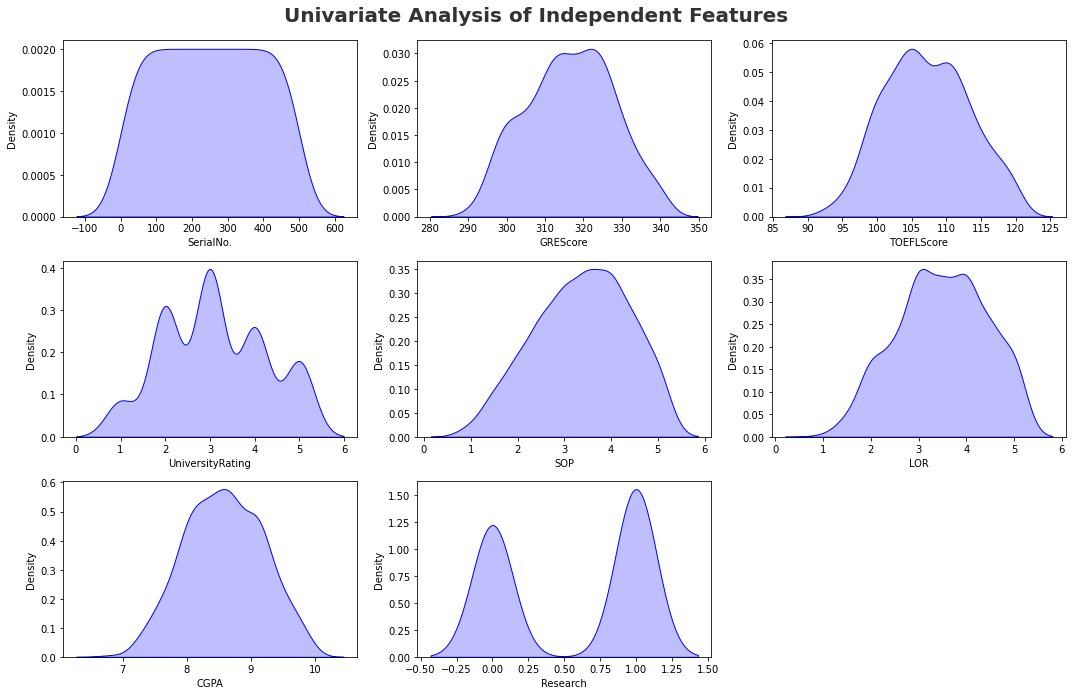

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Independent Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(ind_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=independent_features[ind_features[i]],shade=True, color='b')
    plt.xlabel(ind_features[i])
    plt.tight_layout()

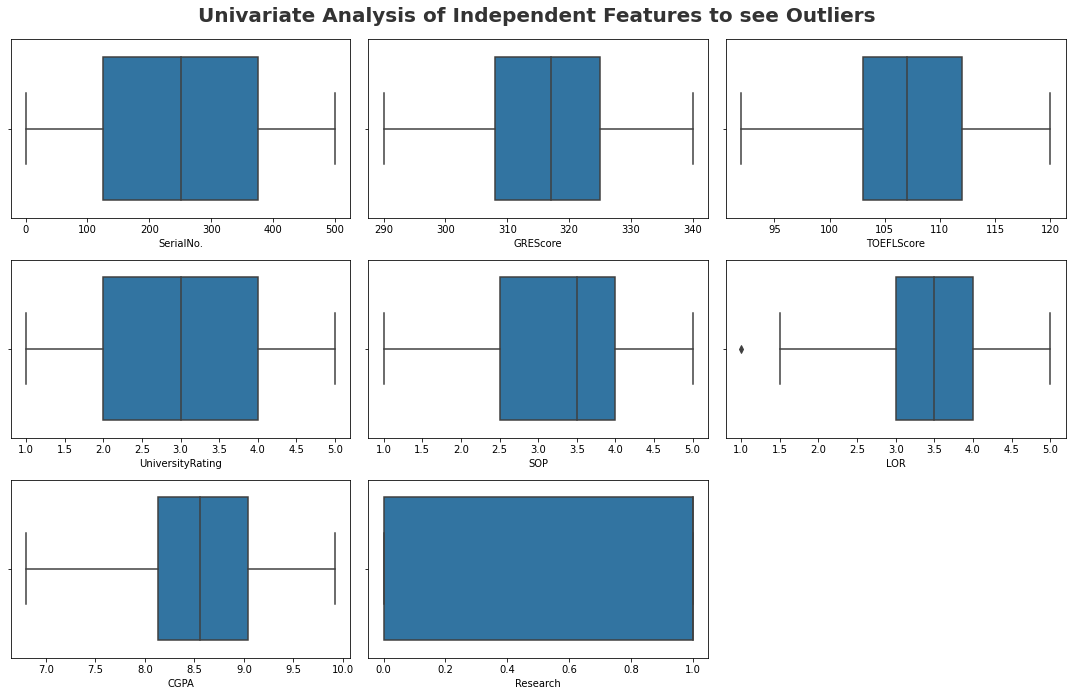

In [13]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Independent Features to see Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(ind_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=independent_features[ind_features[i]], data=independent_features)
    plt.xlabel(ind_features[i])
    plt.tight_layout()


**Observation:** As per earliar pre-speculation, outliers can be seen no or very less outliers.

**Multivariate Analysis**

Multivariate analysis is the analysis of more than one variable.

*Check Multicollinearity in Numerical features*

In [14]:
df[(list(df.columns)[1:])].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Admit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


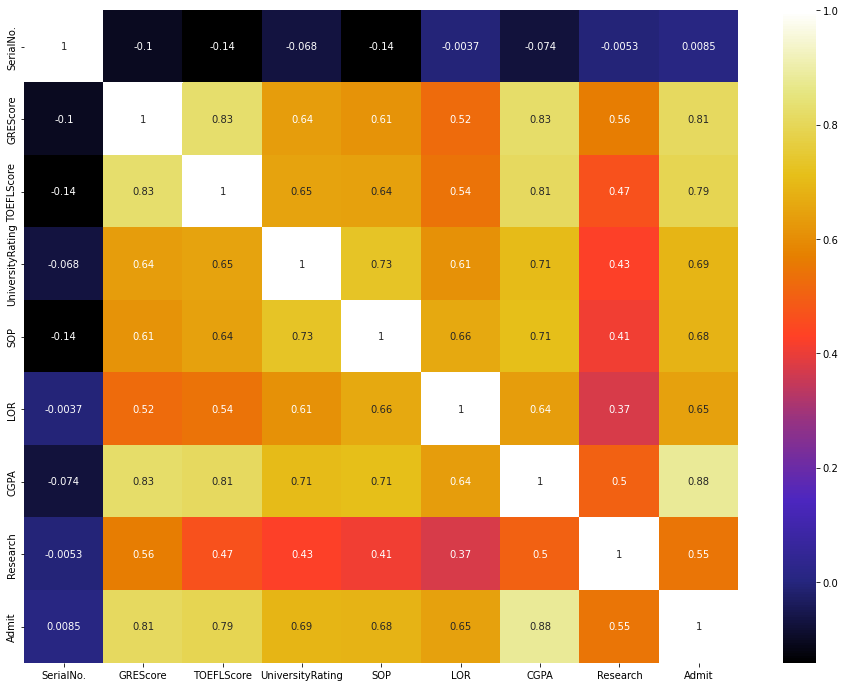

In [15]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Observation:**
Dependent features GREScore, CGPA, TOEFLScore is highly corellated to admission prediction.

**Pair Plot:**

Pairwise relationship between different independent features in a dataset.

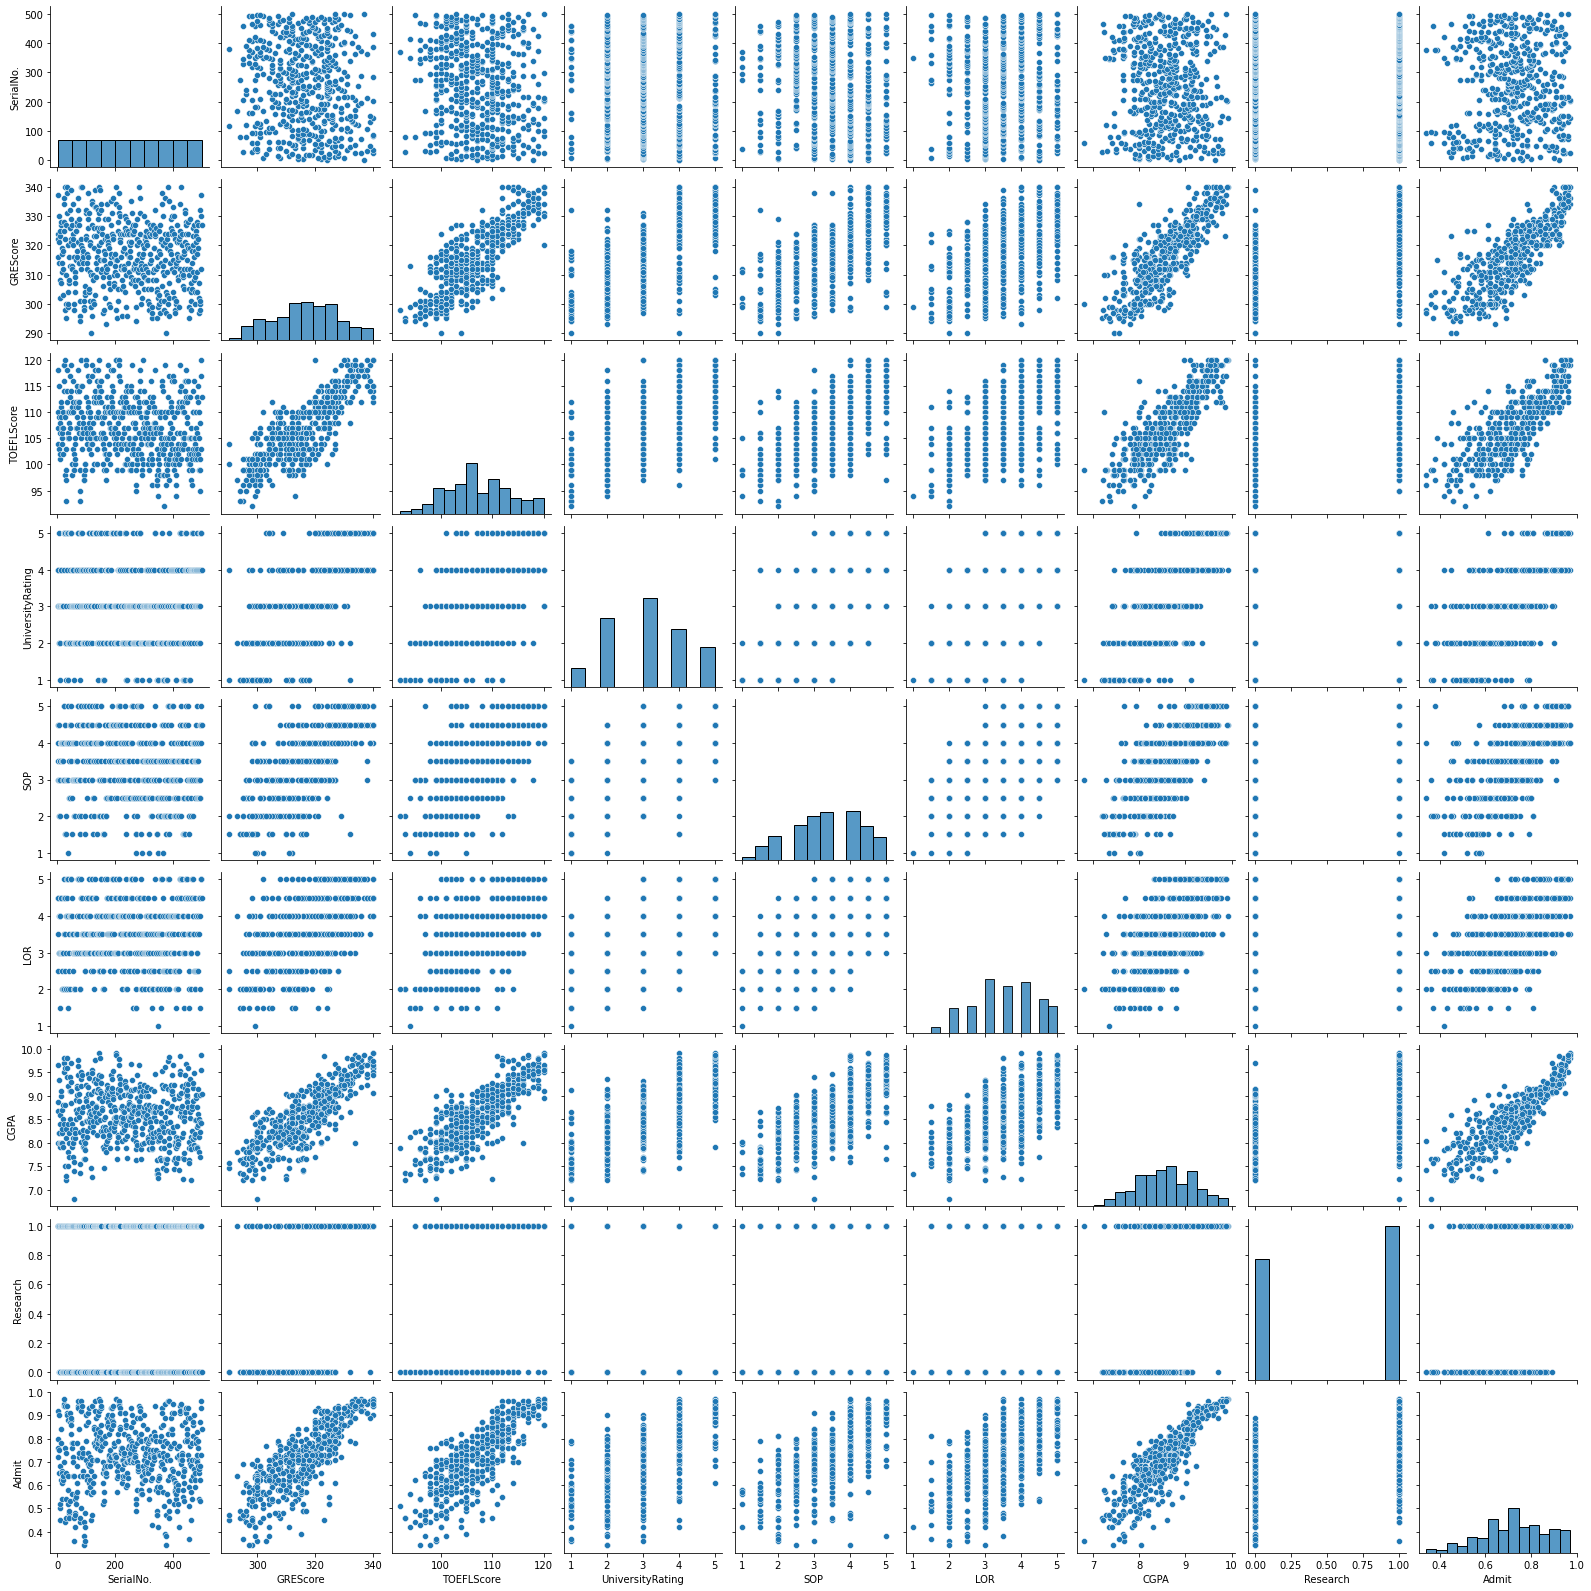

In [16]:
sns.pairplot(df)

**Regplot:**

visualize the linear relationship as determined through regression.

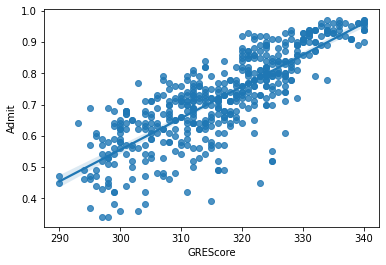

In [17]:
sns.regplot(x="GREScore",y="Admit",data=df)

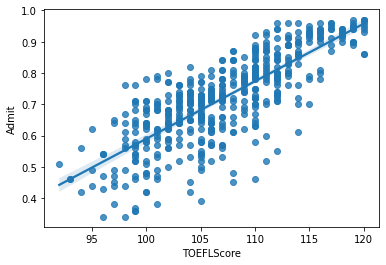

In [18]:
sns.regplot(x="TOEFLScore",y="Admit",data=df)

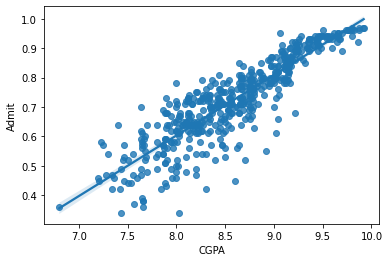

In [19]:
sns.regplot(x="CGPA",y="Admit",data=df)

**Observation:**  CGPA , TOEFLScore ad GREScore is having linear relation with "Admit". Asumption: linear regression or simillar model will perform good with this dataset.

# **ML MODEL BUILDING:**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=independent_features.drop(['UniversityRating', 'SOP', 'LOR', 'Research' ], axis=1)
X

,SerialNo.,GREScore,TOEFLScore,CGPA
0,1.0,337.0,118.0,9.65
1,2.0,324.0,107.0,8.87
2,3.0,316.0,104.0,8.00
3,4.0,322.0,110.0,8.67
4,5.0,314.0,103.0,8.21
...,...,...,...,...
495,496.0,332.0,108.0,9.02
496,497.0,337.0,117.0,9.87
497,498.0,330.0,120.0,9.56
498,499.0,312.0,103.0,8.43


In [22]:
Y=dependent_feature
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Admit, Length: 500, dtype: float64

**DATA splitting among Training and Test data:**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=25)

**Standardize or feature scaling the datasets:**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)
X_train.shape

(335, 4)

*tranforming test test data without fit to avoid data leakage:*

In [26]:
X_test=scaler.transform(X_test)
X_test.shape

(165, 4)

# **Model Training:**

# **Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [28]:
regression.fit(X_train,Y_train)

LinearRegression()

**Print the coefficients and the intercept**

In [29]:
print(regression.coef_)

[0.01513264 0.02795989 0.01793765 0.0847727 ]


In [30]:
print(regression.intercept_)

0.7182686567164178


**Prediction for the test data**

In [31]:
reg_pred=regression.predict(X_test)
reg_pred

array([0.6250564 , 0.77681422, 0.50580496, 0.83164408, 0.87630161,
       0.86062416, 0.55130378, 0.94198099, 0.93826957, 0.68621353,
       0.8448704 , 0.80118558, 0.80644616, 0.51402603, 0.60280125,
       0.80360538, 0.51095981, 0.65775781, 0.48673745, 0.74800639,
       0.8871953 , 0.62522466, 0.86971636, 0.75358656, 0.89768952,
       0.80979322, 0.78910623, 0.72394647, 0.85051206, 0.53887321,
       0.51430273, 0.47986648, 0.67762241, 0.81472009, 0.59580264,
       0.83688299, 0.63558776, 0.72274321, 0.74226494, 0.81264596,
       0.54097348, 0.79188859, 0.67778457, 0.92285841, 0.58468485,
       0.93367291, 0.61615692, 0.84795386, 0.82040606, 0.64474576,
       0.6172724 , 0.87269626, 0.56161379, 0.95767961, 0.79925378,
       0.57009745, 0.9247264 , 0.59175748, 0.84556588, 0.60429695,
       0.50437871, 0.91701032, 0.65721987, 0.61865836, 0.73482508,
       0.47041844, 0.67569641, 0.53967326, 0.44440963, 0.77567254,
       0.87309449, 0.80157373, 0.92483198, 0.65674795, 0.58780

## **Assumptions Of Linear Regression**

Text(0, 0.5, 'Test Predicted Data')

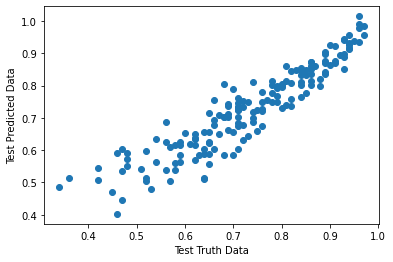

In [32]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

**Observation:**

Actual value and predicted have some difference. If it's 100% matching then we could see all data alined on one line form.

**Residuals:**

In [33]:
residuals=Y_test-reg_pred
residuals

411   -0.065056
380    0.003186
38     0.014195
254    0.018356
234    0.033698
         ...   
126    0.001202
203   -0.014865
490    0.019544
28     0.057390
163   -0.024058
Name: Admit, Length: 165, dtype: float64

In [34]:
type(Y_test)

pandas.core.series.Series

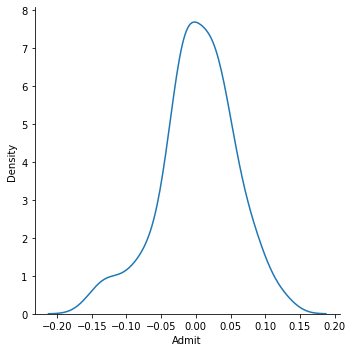

In [35]:
sns.displot(residuals,kind="kde")

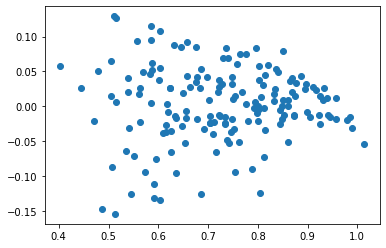

In [36]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

**Performance Metrics:**

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

0.002911676217852689
0.04164972221293517
0.05395995012833767


**Observation:**
MSE and MAE in both error approching to zero. So we might see some good prediction accuracy.

## **R square and adjusted R square:**

In [39]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.8610181462203336


In [40]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8575435998758418

**Observation:** Model is performing quite good but not excellent with Linear regression model.

# **Ridge:**

In [41]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [42]:
ridge.fit(X_train,Y_train)

Ridge()

In [43]:
## print the coefficients and the intercept
print(ridge.coef_)

[0.01509733 0.02812594 0.0182987  0.08408892]


In [44]:
print(ridge.intercept_)

0.7182686567164178


In [45]:
reg_pred=ridge.predict(X_test)
reg_pred

array([0.62466452, 0.77635152, 0.50677628, 0.83148477, 0.87599905,
       0.86062064, 0.55227084, 0.941623  , 0.93799315, 0.6864575 ,
       0.84444429, 0.8009768 , 0.80640285, 0.51441576, 0.60285089,
       0.80302555, 0.51089799, 0.65842163, 0.48705169, 0.74775743,
       0.88698334, 0.62528175, 0.86978244, 0.75290171, 0.89738902,
       0.80937819, 0.78947341, 0.72375979, 0.85070609, 0.53943726,
       0.51484436, 0.48039757, 0.67732228, 0.81433951, 0.59652685,
       0.83680644, 0.63503537, 0.72275849, 0.74221814, 0.81249709,
       0.54053748, 0.79189325, 0.67806268, 0.92253662, 0.58480283,
       0.93376446, 0.61635258, 0.84779568, 0.82023137, 0.6454081 ,
       0.61662413, 0.87251148, 0.56239315, 0.95748987, 0.79814998,
       0.57067473, 0.92434657, 0.59179517, 0.84505947, 0.60424987,
       0.50463389, 0.91696498, 0.65707457, 0.61894807, 0.7344954 ,
       0.47114774, 0.67509051, 0.53994309, 0.44513059, 0.77562449,
       0.87298319, 0.80139712, 0.92458646, 0.65598611, 0.58751

### **Assumptions Of Ridge Regression:**

Text(0, 0.5, 'Test Predicted Data')

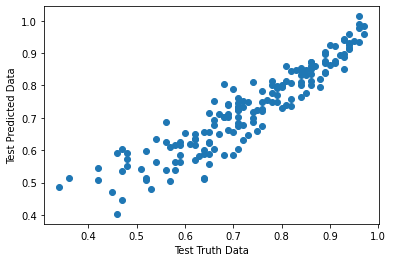

In [46]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [47]:
## residuals
residuals=Y_test-reg_pred
residuals

411   -0.064665
380    0.003648
38     0.013224
254    0.018515
234    0.034001
         ...   
126    0.001593
203   -0.014408
490    0.019359
28     0.056936
163   -0.023961
Name: Admit, Length: 165, dtype: float64

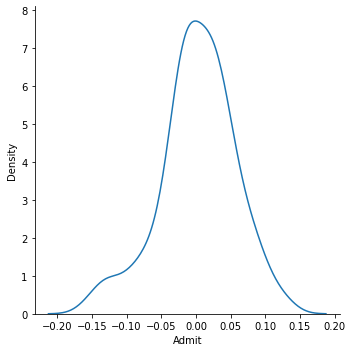

In [48]:
sns.displot(residuals,kind="kde")

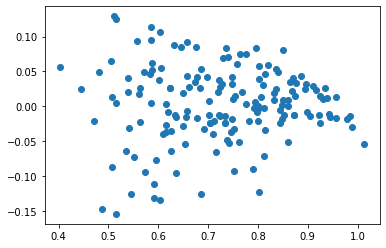

In [49]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [50]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

0.0029087666680380165
0.04159301916710484
0.053932983118292435


## **R square and adjusted R square:**

In [51]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.8611570265753772


In [52]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8576859522397616

# **Lasso**

In [53]:
from sklearn import linear_model
las = linear_model.Lasso()

In [54]:
las

Lasso()

In [55]:
las.fit(X_train,Y_train)

Lasso()

In [56]:
## print the coefficients and the intercept
print(las.coef_)

[-0.  0.  0.  0.]


In [57]:
print(las.intercept_)

0.7182686567164179


In [58]:
## PRediction for the test data
las_pred=las.predict(X_test)
las_pred

array([0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826

## **Assumptions Of LASSO:**

Text(0, 0.5, 'Test Predicted Data')

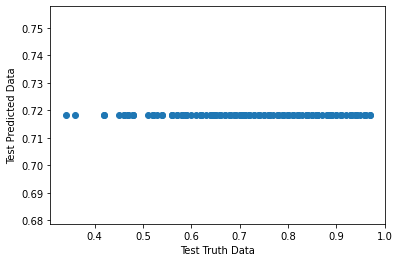

In [59]:
plt.scatter(Y_test,las_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [60]:
## residuals
residuals=Y_test-las_pred
residuals

411   -0.158269
380    0.061731
38    -0.198269
254    0.131731
234    0.191731
         ...   
126    0.131731
203    0.251731
490   -0.048269
28    -0.258269
163   -0.038269
Name: Admit, Length: 165, dtype: float64

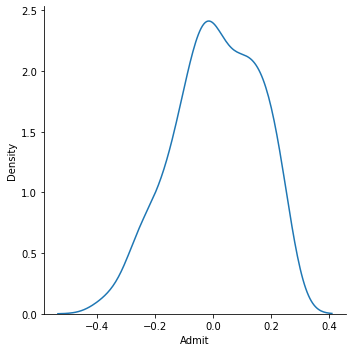

In [61]:
sns.displot(residuals,kind="kde")

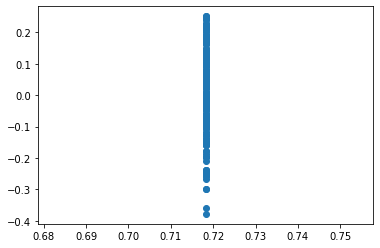

In [62]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(las_pred,residuals)

In [63]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,las_pred))
print(mean_absolute_error(Y_test,las_pred))
print(np.sqrt(mean_squared_error(Y_test,las_pred)))

0.021060699946670987
0.11952799638172772
0.14512305105210194


## **R square and adjusted R square:**

In [64]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,las_pred)
print(score)

-0.005281803841605814


In [65]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-0.030413848937645982

# **Elastic-Net:**

In [66]:
from sklearn.linear_model import ElasticNet
Ela = ElasticNet()
Ela

ElasticNet()

In [67]:
Ela.fit(X_train,Y_train)

ElasticNet()

In [68]:
## print the coefficients and the intercept
print(Ela.coef_)

[-0.  0.  0.  0.]


In [69]:
print(Ela.intercept_)

0.7182686567164179


In [70]:
## PRediction for the test data
Ela_pred=Ela.predict(X_test)
Ela_pred

array([0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826866,
       0.71826866, 0.71826866, 0.71826866, 0.71826866, 0.71826

## **Assumptions Of Elastic Net:**

Text(0, 0.5, 'Test Predicted Data')

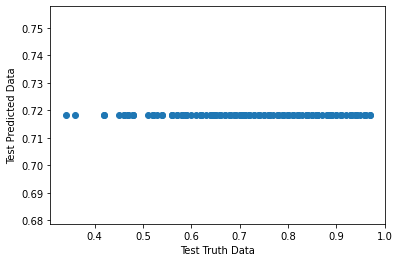

In [71]:
plt.scatter(Y_test,Ela_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [72]:
## residuals
residuals=Y_test-Ela_pred
residuals

411   -0.158269
380    0.061731
38    -0.198269
254    0.131731
234    0.191731
         ...   
126    0.131731
203    0.251731
490   -0.048269
28    -0.258269
163   -0.038269
Name: Admit, Length: 165, dtype: float64

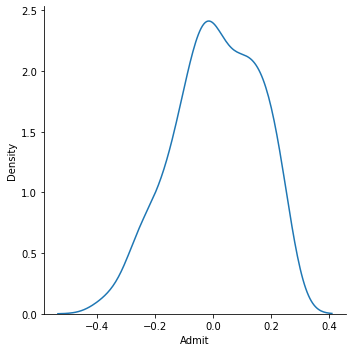

In [73]:
sns.displot(residuals,kind="kde")

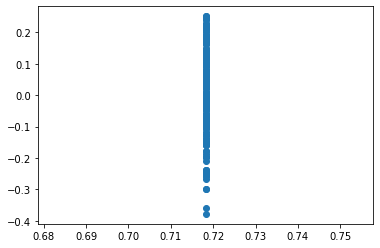

In [74]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(Ela_pred,residuals)

In [75]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,Ela_pred))
print(mean_absolute_error(Y_test,Ela_pred))
print(np.sqrt(mean_squared_error(Y_test,Ela_pred)))

0.021060699946670987
0.11952799638172772
0.14512305105210194


## **R square and adjusted R square:**

In [76]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Ela_pred)
print(score)

-0.005281803841605814


In [77]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-0.030413848937645982

# **DecisionTreeRegressor**

In [78]:
from sklearn.tree import DecisionTreeRegressor
model_D=DecisionTreeRegressor()

In [79]:
model_D.fit(X_train,Y_train)

DecisionTreeRegressor()

In [80]:
model_D.score(X_train,Y_train)

1.0

[Text(0.5736504335982735, 0.975, 'X[3] <= 0.622\nsquared_error = 0.019\nsamples = 335\nvalue = 0.718'),
 Text(0.2651290596378566, 0.925, 'X[3] <= -0.897\nsquared_error = 0.011\nsamples = 237\nvalue = 0.654'),
 Text(0.10403726708074534, 0.875, 'X[3] <= -1.525\nsquared_error = 0.009\nsamples = 69\nvalue = 0.551'),
 Text(0.050952731866512266, 0.825, 'X[1] <= -1.423\nsquared_error = 0.005\nsamples = 21\nvalue = 0.47'),
 Text(0.03452995052110749, 0.775, 'X[1] <= -1.602\nsquared_error = 0.002\nsamples = 12\nvalue = 0.434'),
 Text(0.02189704179387304, 0.725, 'X[0] <= 1.206\nsquared_error = 0.001\nsamples = 9\nvalue = 0.45'),
 Text(0.01347510264238341, 0.675, 'X[0] <= -0.487\nsquared_error = 0.0\nsamples = 7\nvalue = 0.461'),
 Text(0.006737551321191705, 0.625, 'X[1] <= -1.915\nsquared_error = 0.0\nsamples = 4\nvalue = 0.45'),
 Text(0.0033687756605958524, 0.575, 'squared_error = 0.0\nsamples = 1\nvalue = 0.46'),
 Text(0.010106326981787556, 0.575, 'X[3] <= -1.686\nsquared_error = 0.0\nsamples = 

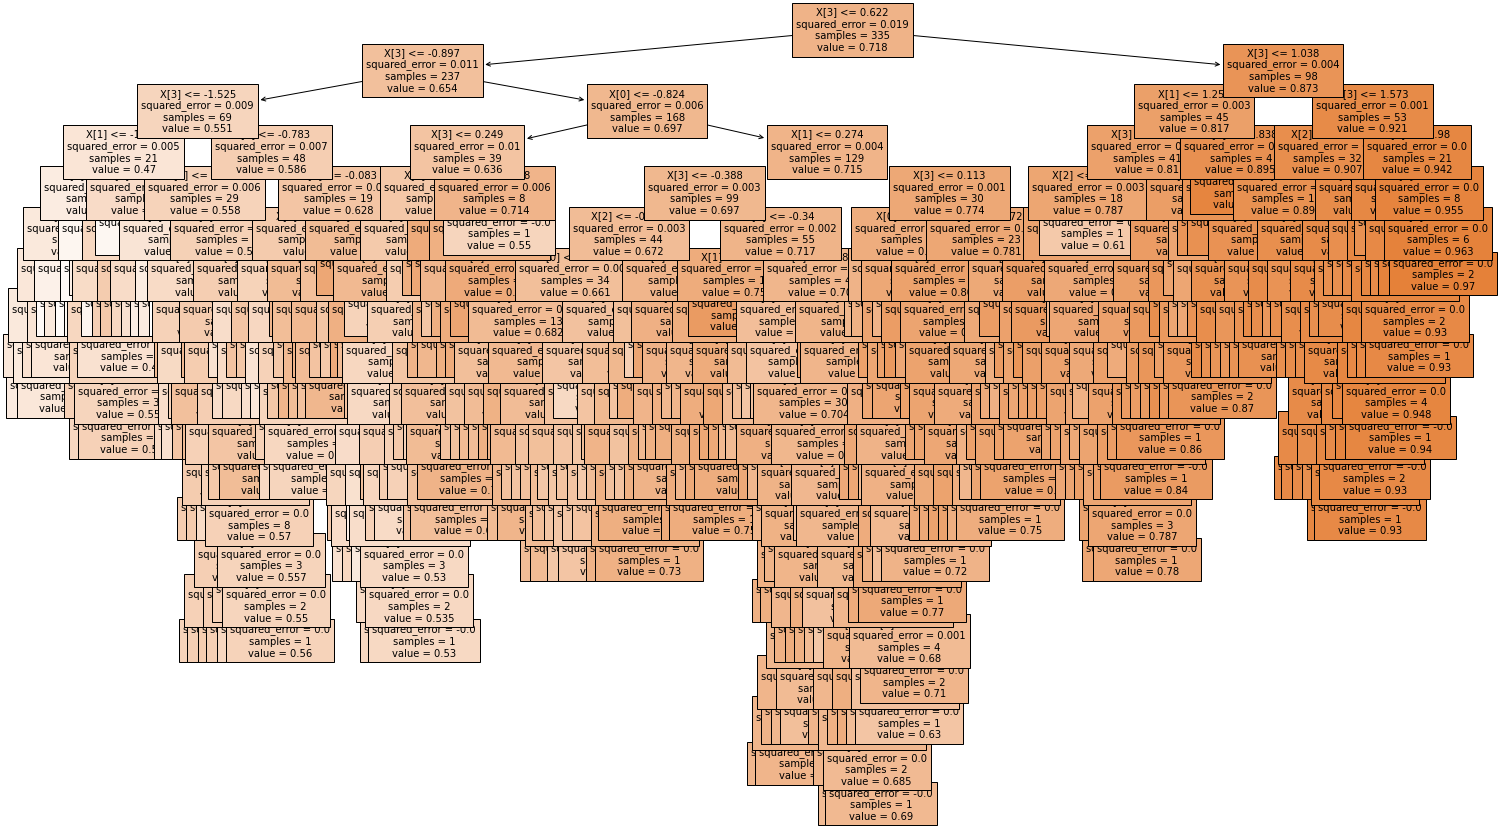

In [81]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_D,filled=True, fontsize=10)

In [82]:
y_predict=model_D.predict(X_test)

In [83]:
print(mean_squared_error(Y_test,y_predict))
print(mean_absolute_error(Y_test,y_predict))
print(np.sqrt(mean_squared_error(Y_test,y_predict)))

0.007281818181818181
0.06127272727272727
0.08533357007542917


In [84]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_predict)
print(score)

0.6524199416163335


In [85]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6437304401567419

**Observation:**

Model is not performing good.

**Hyper-parameter Tuining:**

In [86]:
grid_param = {
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'max_features' : ['sqrt', 'log2'],
    'splitter': ['best', 'random']
    
}

In [87]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model_D,param_grid=grid_param,cv=3,verbose=1)

In [88]:
grid_searh.fit(X_train,Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [89]:
grid_searh.best_params_

{'criterion': 'friedman_mse', 'max_features': 'log2', 'splitter': 'best'}

**ALL defaults are coming as best so we will not see any improvement.**

In [90]:
model_DM=DecisionTreeRegressor(criterion= 'squared_error', max_features= 'log2', splitter= 'best')

In [91]:
model_DM.fit(X_train,Y_train)

DecisionTreeRegressor(max_features='log2')

In [92]:
y_predictM=model_DM.predict(X_test)

In [93]:
score=r2_score(Y_test,y_predictM)
print(score)

0.7408554171451615


# **Random Forest Regressor**

In [94]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()

In [95]:
model2.fit(X_train,Y_train)

RandomForestRegressor()

In [96]:
model2.score(X_train,Y_train)

0.9700316832152661

In [97]:
y_predict2=model2.predict(X_test)

In [98]:
print(mean_squared_error(Y_test,y_predict2))
print(mean_absolute_error(Y_test,y_predict2))
print(np.sqrt(mean_squared_error(Y_test,y_predict2)))

0.0038237736363636353
0.043245454545454594
0.06183666902707192


In [99]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_predict2)
print(score)

0.8174813720161651


**Hyper-parameter Tuining**

In [100]:
grid_param = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_features' : ['sqrt', 'log2']
    
}

In [101]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model2,param_grid=grid_param,cv=3,verbose=1)

In [102]:
grid_searh.fit(X_train,Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['sqrt', 'log2']},
             verbose=1)

In [103]:
grid_searh.best_params_

{'criterion': 'squared_error', 'max_features': 'log2'}

In [104]:
model_with_best_params4=RandomForestRegressor(criterion='squared_error', max_features='log2')

In [105]:
model_with_best_params4.fit(X_train,Y_train)

RandomForestRegressor(max_features='log2')

In [106]:
y_predict4=model_with_best_params4.predict(X_test)

In [107]:
print(mean_squared_error(Y_test,y_predict4))
print(mean_absolute_error(Y_test,y_predict4))
print(np.sqrt(mean_squared_error(Y_test,y_predict4)))

0.0031619321212121173
0.04168484848484846
0.056231060111046435


In [108]:
score=r2_score(Y_test,y_predict4)
print(score)

0.8490727832177642


**Observation:**

Not excellent but Good performance.

# **Bagging Regressor**

In [109]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


In [110]:
model_bagging_LR = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=50, random_state=0).fit(X_train,Y_train)

In [111]:
y_predict5=model_bagging_LR.predict(X_test)

In [112]:
print(mean_squared_error(Y_test,y_predict5))
print(mean_absolute_error(Y_test,y_predict5))
print(np.sqrt(mean_squared_error(Y_test,y_predict5)))

0.0029222986347586656
0.041788040945403906
0.05405828923262986


In [113]:
score=r2_score(Y_test,y_predict5)
print(score)

0.8605111107250538


**Observation:**

Improved performance.

**SVR**

In [114]:
from sklearn.svm import SVR

In [115]:
model_bagging_SVR = BaggingRegressor(base_estimator=SVR(),n_estimators=50, random_state=40).fit(X_train,Y_train)

In [116]:
y_predict6=model_bagging_SVR.predict(X_test)

In [117]:
print(mean_squared_error(Y_test,y_predict6))
print(mean_absolute_error(Y_test,y_predict6))
print(np.sqrt(mean_squared_error(Y_test,y_predict6)))

0.004676571532075127
0.05523405735086791
0.06838546287095765


In [118]:
score=r2_score(Y_test,y_predict6)
print(score)

0.7767751177566202


**Decision Tree Regressor**

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
model_bagging_DTR = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=50, random_state=40).fit(X_train,Y_train)

In [121]:
y_predict7=model_bagging_DTR.predict(X_test)

In [122]:
score=r2_score(Y_test,y_predict7)
print(score)

0.822232058068079


Observation:

With bagging Decission tree have well improved performance from 63% to 82% accuracy.

# **Voting Regressor**

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])


In [127]:
er.fit(X_train, Y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('r3', KNeighborsRegressor())])

In [130]:
y_predict8=er.predict(X_test)

In [131]:
score=r2_score(Y_test,y_predict8)
print(score)

0.8582052023716048
